# Ridge & Lasso Regression implementation
On a coffee shop revenue dataset

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Linear Regression 
First up, we apply Lin Reg on a dataset of coffee_shop_revenue

In [58]:
df = pd.read_csv("C:\Rig\Work\ML ig\coffee_shop_revenue.csv") #[:1000]
df.head(6)

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\rigag\AppData\Local\Temp\ipykernel_18408\958252332.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_csv("C:\Rig\Work\ML ig\coffee_shop_revenue.csv") #[:1000]


,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42
5,121,8.88,6,9,183.49,484,1155.18


In [59]:
df.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


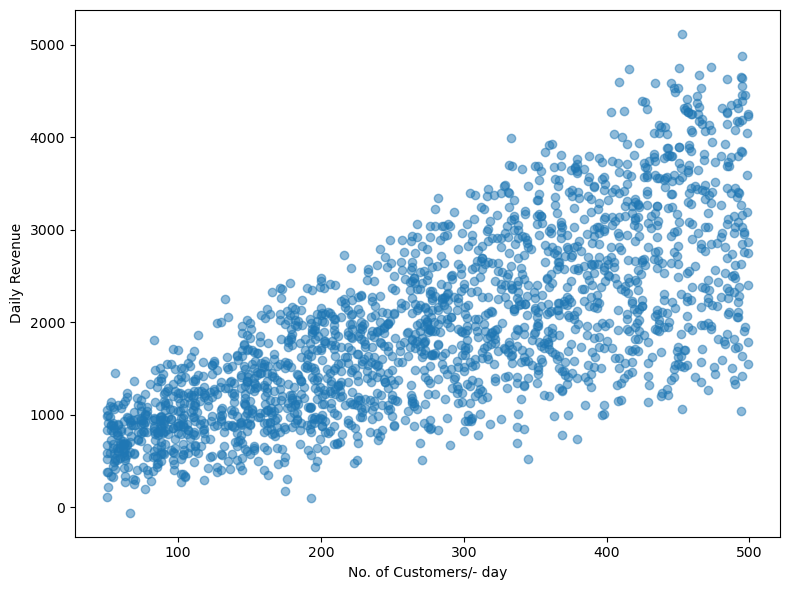

In [60]:
#Visalising Data for no reason at all
plt.figure(figsize=[8,6])
plt.scatter(df["Number_of_Customers_Per_Day"],df["Daily_Revenue"],alpha=0.5)
plt.xlabel("No. of Customers/- day")
plt.ylabel("Daily Revenue")
plt.tight_layout()

In [61]:
# Data Preprocessing
# We remove outliers for a better model, a better accuracy

#Since Daily Revenue is Right skewed, we remove outliers from it

Q1 = df['Daily_Revenue'].quantile(0.25)
Q3 = df['Daily_Revenue'].quantile(0.75)
IQR = Q3 - Q1
lower= Q1 - 1.5*IQR
upper= Q3 + 1.5*IQR
df=df[(df['Daily_Revenue'] >= lower) & (df['Daily_Revenue']) <= upper]

In [63]:
X=df.iloc[:,0:6]
y=df.iloc[:,-1]  # Or, y=df[["Daily_Revenue"]]
X.head(3)

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic
0,152,6.74,14,4,106.62,97
1,485,4.50,12,8,57.83,744
2,398,9.09,6,6,91.76,636


In [64]:
y.head(3)

0    1547.81
1    2084.68
2    3118.39
Name: Daily_Revenue, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42) 

In [67]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
from sklearn.linear_model import LinearRegression

regress=LinearRegression()
regress.fit(X_train,y_train)

LinearRegression()

In [69]:
y_pred=regress.predict(X_test)

In [70]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean squared erraa: {mse:.4f}" )
print(f"Root Mean Squared erraa: {rmse:.4f}")
print(f"R2 score: {r2:.4f}")

Mean squared erraa: 97569.7229
Root Mean Squared erraa: 312.3615
R2 score: 0.8956


## Ridge Regression 
||y - Xw||^2_2 + alpha * ||w||^2_2

In [72]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
#cross validation will be carried out by GridSearchCV

ridge_reg = Ridge()
parameters = {"alpha": [0.01,0.1,0.5,1,2,2.5,2.6,5,10,30,50,90,100]}
ridgecv = GridSearchCV(ridge_reg,parameters,scoring='r2',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 2, 2.5, 2.6, 5, 10, 30,
                                   50, 90, 100]},
             scoring='r2')

In [73]:
print(f"Best parameter = {ridgecv.best_params_}")

Best parameter = {'alpha': 2.6}


In [74]:
ridge_pred = ridgecv.predict(X_test)

In [75]:
mse_ridge = mean_squared_error(y_test, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge_pred))
r2_ridge = r2_score(y_test, ridge_pred)

print(f"Mean squared erraa: {mse_ridge:.4f}" )
print(f"Root Mean Squared erraa: {rmse_ridge:.4f}")
print(f"R2 score: {r2_ridge:.4f}")

Mean squared erraa: 97537.1585
Root Mean Squared erraa: 312.3094
R2 score: 0.8956


## Lasso Regression
||y - Xw||^2_2 + alpha * ||w||^1

In [86]:
from sklearn.linear_model import Lasso

lasso=Lasso()
parameters_lasso = {'alpha': [0.01,0.1,1,5,10,11,12,15,20,40,80]}
lassocv= GridSearchCV(lasso,parameters_lasso,scoring='r2',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10, 11, 12, 15, 20, 40,
                                   80]},
             scoring='r2')

In [87]:
print(f"Best parameter(for lasso) : {lassocv.best_params_}")

Best parameter(for lasso) : {'alpha': 5}


In [88]:
lasso_pred = lassocv.predict(X_test)

In [93]:
mse_lasso = mean_squared_error(y_test, lasso_pred)
rmse_lasso = np.sqrt(mean_squared_error(y_test, lasso_pred))
r2_lasso = r2_score(y_test, lasso_pred)

print(f"Mean squared erraa: {mse_lasso:.4f}" )
print(f"Root Mean Squared erraa: {rmse_lasso:.4f}")
print(f"R2 score: {r2_lasso:.4f}")

Mean squared erraa: 97747.1139
Root Mean Squared erraa: 312.6453
R2 score: 0.8954


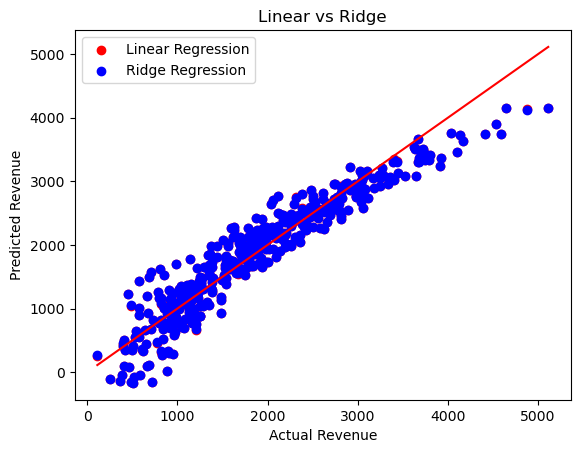

In [94]:
plt.scatter(y_test, y_pred, label='Linear Regression', alpha=1, color='red')
plt.scatter(y_test, ridge_pred, label='Ridge Regression', alpha=1, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Linear vs Ridge")
plt.legend()

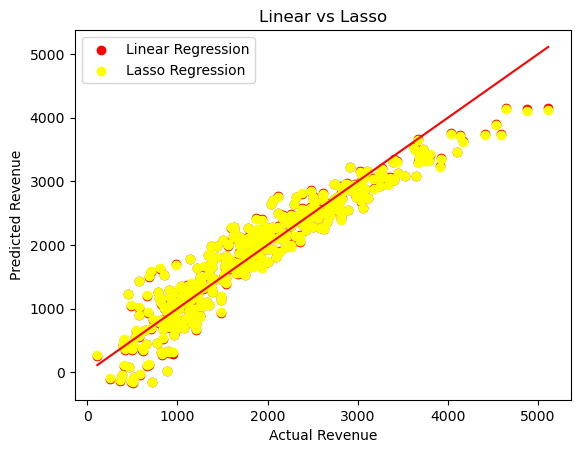

In [100]:
plt.scatter(y_test, y_pred, label='Linear Regression', alpha=1, color='red')
plt.scatter(y_test, lasso_pred, label='Lasso Regression', alpha=1, color='yellow')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Linear vs Lasso")
plt.legend()

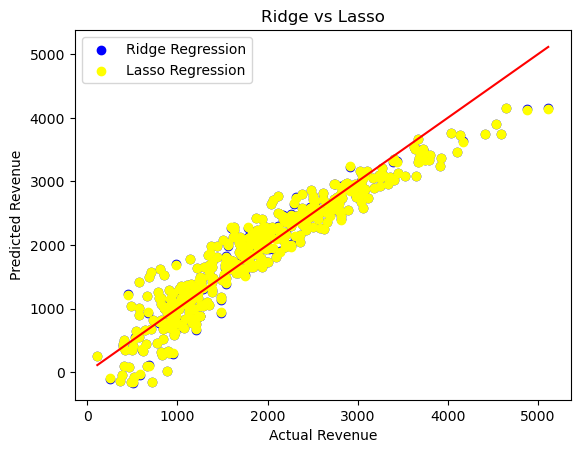

In [46]:
plt.scatter(y_test, ridge_pred, label='Ridge Regression', alpha=1, color='blue')
plt.scatter(y_test, lasso_pred, label='Lasso Regression', alpha=1, color='yellow')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Ridge vs Lasso")
plt.legend()

#### Done.
We have implemented Linear, Ridge, Lasso regression successfully. We have also plotted the graphs, to compare the outputs of each model. (Not that different I must say. Perhaps the difference is more discernable on a larger dataset).

### Thank You
(What for?)

#### How to make this work in actual sense? Where do u give the input to get a prediction?

https://www.kaggle.com/code/saurabhvishwakarmaa/coffee-shop-daily-revenue-prediction

Check out this page